## Import and Load

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [46]:
filename = ('Data/data (6).csv')
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1.0,1.0,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0.0,NaN,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


## VitD_Levels

In [47]:
def histogram_std (col):
    
    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    kurt = stats.kurtosis((feature), fisher = False)
    print(f' Kurt = {kurt:,.2f}')

    fig,ax = plt.subplots(figsize = (10,6))
    sns.histplot(feature, ax = ax, stat = 'probability', kde = True)
    ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}');
    ax.axvline(median, color = 'green', ls = '--', label = f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black', label = f'+1std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)

    ax.set_title(f'{col}')
    ax.legend(); 


 Kurt = 3.01


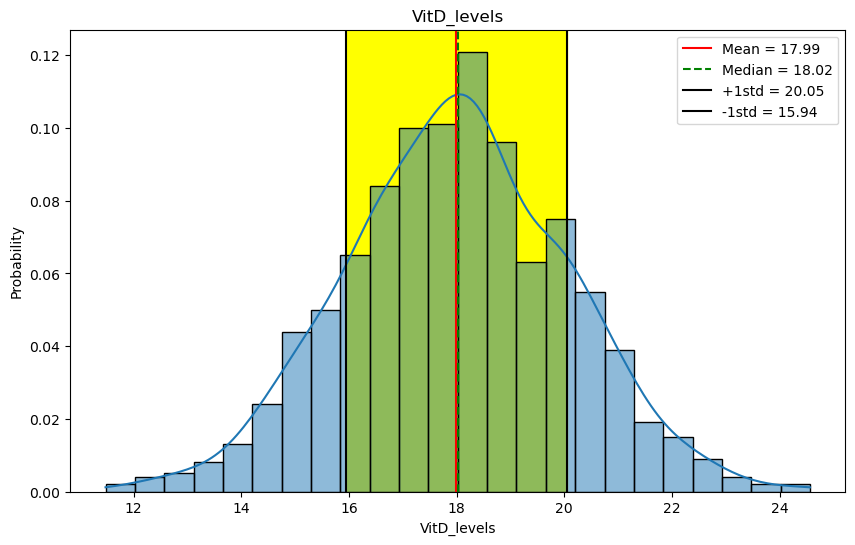

In [48]:
histogram_std('VitD_levels')

**Questions:** 
1. Is it Discrete or Continuous?

Continuous; can take on infinite # of values. 

2. Does it have a skew? If so, which direction (+-)

It has a normal skew

3. What type of kurtosis does it display?

Kurt score ~3 so mesokurtic or normal with values clustering in the middle of the distribution.

 Kurt = 2.99


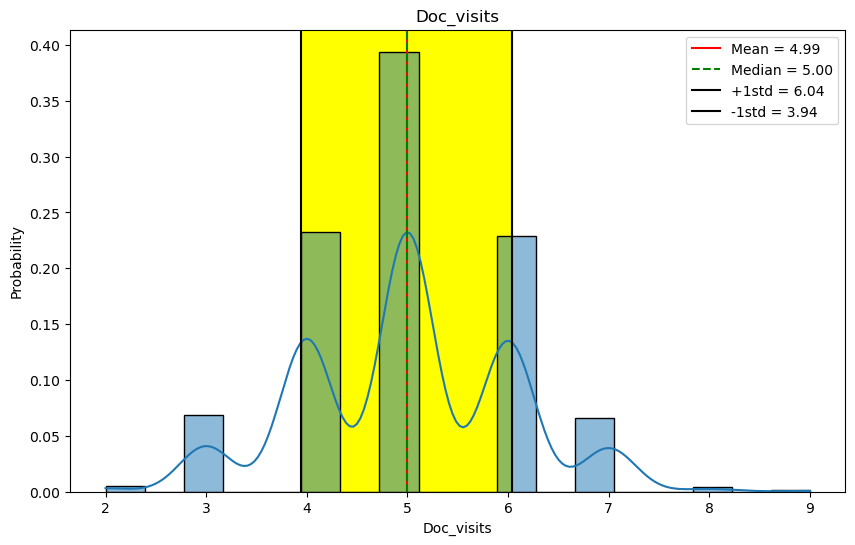

In [50]:
histogram_std('Doc_visits')

**Questions:**

Is it Discrete or Continuous?

It is discrete. 

Does it have a skew? If so, which direction (+-)

It has a normal skew

What type of kurtosis does it display?

Kurt score is 2.99 which is very close to 3 but technically because it is below 3, it is platykurtic where values cluster in the tails of the distribution. 

 Kurt = 3.27


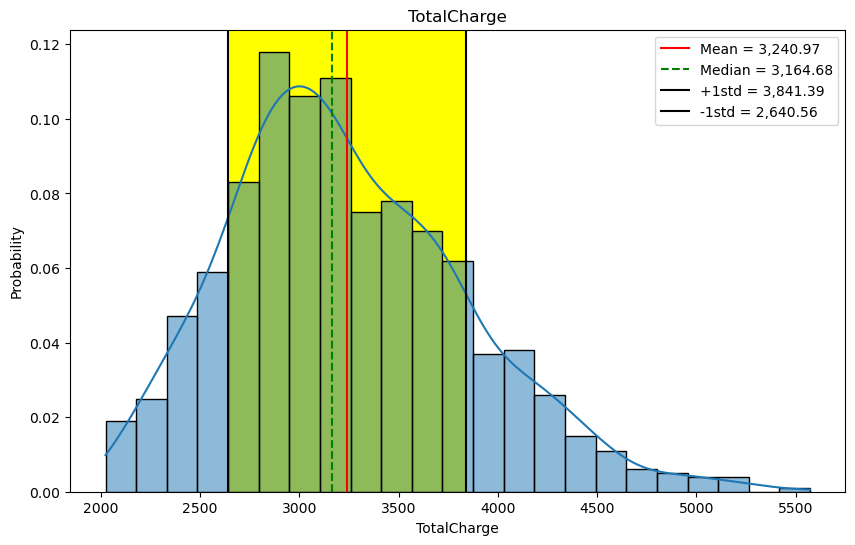

In [53]:
histogram_std('TotalCharge')

**Questions:**

Is it Discrete or Continuous?

It is continuous and can take on an infinite number of values. 

Does it have a skew? If so, which direction (+-)?

Slight positive skew with longer right tail. 

What type of kurtosis does it display?

Kurt score is 3.27 which is >3 and Leptokurtic where values cluster in the peak of the distribution. 